In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [3]:
datafile = '/content/drive/MyDrive/ml-data/face-images/faces.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']
print(X.shape)

(5000, 1024)


In [4]:
def data2Image(x):
    width, height = 32, 32
    return x.reshape((32, 32))

def displayData(X, nrows=32, ncols=32, isRandom=False):
    w, h = 32, 32
    if isRandom == True:
        indicesDisplayed = random.sample(  range(X.shape[0]), nrows * ncols  )
    else:
        indicesDisplayed = np.arange(nrows * ncols)
    bigPicture = np.zeros((h * nrows, w * ncols))
    indexForData = 0
    for i in range(nrows):
        for j in range(ncols):
            bigPicture[i*w : (i+1)*w, j*h : (j+1)*h] = data2Image(X[indicesDisplayed[indexForData]]).T
            indexForData += 1
    fig = plt.figure(figsize=(7, 7))
    img = plt.imshow(bigPicture, cmap="gray")

In [5]:
from sklearn.decomposition import NMF

X_ = X + 128

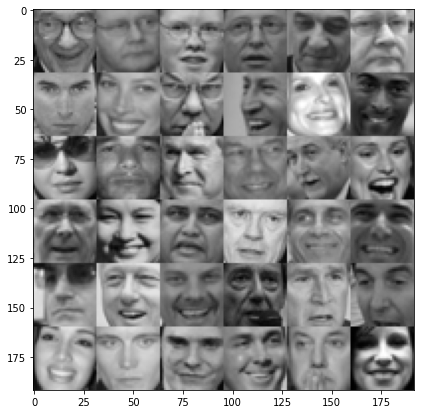

In [6]:
displayData(X_, nrows=6, ncols=6)

In [7]:
nmf = NMF(n_components=10)
X_nmf = nmf.fit_transform(X_)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [8]:
X_recovered = nmf.inverse_transform(X_nmf)

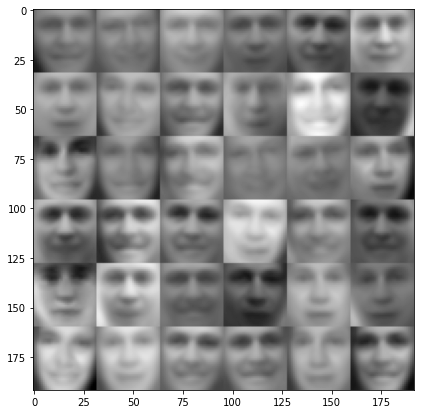

In [9]:
displayData(X_recovered, nrows=6, ncols=6)

In [11]:
steps = 5
for i in range(1, 200, steps):
  nmf = NMF(n_components=i, max_iter=300)
  X_nmf = nmf.fit_transform(X_)
  X_recovered = nmf.inverse_transform(X_nmf)
  displayData(X_recovered, nrows=6, ncols=6)

Output hidden; open in https://colab.research.google.com to view.